# Head 1st / Head 2nd / Work 1st / Work 2nd

In [1]:
import pyreadstat
import os
import gc
import numpy as np
import copy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

.sav ===> import pyreadstat, pyreadstat.read_sav(file_path)

.sas7bdat  ====> pandas, pd.read_sas(file_path)

.dta  ===> pd.read_stata(file_path)

In [12]:
def call_df():
    path = 'C:/Users/hml76/Desktop/Jupyter/HRD_With_MJ/HCCPII_20230828/'
    file_path = path+'2. SPSS/HCCP_2ndWave_Work_2nd.sav'

    dataframe, meta = pyreadstat.read_sav(file_path)
    columns_to_drop0 = ['W21ID2', 'W21ID3']
    dataframe = dataframe.drop(columns=columns_to_drop0)
    
    #y = df[y_name]
    #df.drop(columns=[y_name])
    gc.collect()
    return dataframe

In [13]:
def check_nan(input_dataframe):
    nan_values = input_dataframe.isna()
    nan_count_per_column = nan_values.sum()
    Nan_cols = []
    columns_with_nan = nan_count_per_column[nan_count_per_column > 0]  # Filter columns with NaN values
    print("Columns with NaN values and count of NaN values:")
    for column, count in columns_with_nan.items():
        print(f"Column '{column}' has {count} NaN value(s).")
        Nan_cols.append(column)    
        
    dataframe = input_dataframe.drop(columns=Nan_cols)
    return dataframe


def equal_distirubution_mulit_label(dataframe, y_lst):
    
    balanced_df = pd.DataFrame()  # Initialize an empty DataFrame to store the balanced data
    
    balanced_df = dataframe.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle the rows 
    #y_balanced = balanced_df[y_lst]
    y_balanced = balanced_df[y_lst].values
    X_balanced = balanced_df.drop(columns=y_lst)
    
    return X_balanced, y_balanced

In [14]:
from sklearn.metrics import classification_report

def XGBoost_multi_label(X_balanced, y_balanced):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
    
    print(y_train.shape)
    model = XGBClassifier(objective='binary:logistic', num_class=1, subsample=0.8, reg_lambda=0, reg_alpha=0.5, n_estimators=200,
                    min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.1,
                    colsample_bytree=0.6)
    
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)
    y_pred_proba = model.predict_proba(X_test)
    y_pred = [[1 if prob > 0.5 else 0 for prob in pred] for pred in y_pred_proba]
    
    print("\tAccuracy ========> ", accuracy_score(y_test, y_pred))
    print("classification_report\n", classification_report(y_test, y_pred, digits=4))
    
    #plot_importance(model, max_num_features=10)
    #plt.show()
    
    return model, X_train, X_test, y_test, y_pred

In [15]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def XGBoost_learning_curve(X_balanced, y_balanced, title):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    model = XGBClassifier(objective='binary:logistic', num_class=1, subsample=0.8, reg_lambda=0, reg_alpha=0.5, n_estimators=200,
                          min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.1,
                          colsample_bytree=0.6)

    eval_set = [(X_train, y_train), (X_test, y_test)]  # Use both training and test sets for evaluation
    eval_metric = ["error", "logloss"]  # Evaluation metrics to be monitored
    model.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, early_stopping_rounds=100, verbose=False)

    eval_results = model.evals_result()

    num_epochs = len(eval_results['validation_0']['error'])  # Number of epochs
    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(13, 3.5), dpi=150)
    plt.rcParams['font.family'] = 'Times New Roman'

    plt.subplot(1, 2, 1)
    plt.plot(epochs, eval_results['validation_0']['logloss'], label='Train', marker='o', markersize=3, c='darkblue')
    plt.plot(epochs, eval_results['validation_1']['logloss'], label='Test', marker='o', markersize=3, c='darkred')
    plt.xlabel('Number of Epochs', fontsize=13)
    plt.ylabel('Log Loss', fontsize=13)
    plt.title('{}'.format(title), fontsize=15)
    plt.legend(fontsize=12)
    
    plt.grid(True, linestyle='dotted')
    plt.show()
    
    return model, X_train, X_test, y_test

In [16]:
def feature_imp1(input_model, X_train_, top_k):
    feature_importance = input_model.feature_importances_
    top_indices = np.argsort(feature_importance)[::-1][:top_k]
    top_indices = X.columns[top_indices]
    print(top_indices)

In [17]:
def feature_imp2(input_model, max_num_features):
    plot_importance(input_model, max_num_features)
    plt.show()

In [18]:
def class_one_to_five_TO_one_to_two_multi(dataframe, y_lst):
    for i in range(len(y_lst)):
        print(y_lst[i])
        
        dataframe_1 = dataframe[dataframe[y_lst[i]] != 3]
        dataframe[y_lst[i]] = dataframe_1[y_lst[i]].map({1: 1, 2: 1, 4: 2, 5: 2})
    df_cleaned = dataframe.dropna()

    return df_cleaned

In [19]:
def erase_col_for_importance(dataframe, erase_col_lst):
    dataframe = dataframe.drop(columns=erase_col_lst)
    
    return dataframe

In [20]:
from sklearn.inspection import permutation_importance
def permutational_importance_(model, x_test_, y_test_, Xs):
    result = permutation_importance(model, x_test_, y_test_, n_repeats=10, random_state=42)

    feature_names = Xs.columns

    sorted_idx = result.importances_mean.argsort()

    #plt.figure(figsize=(10, 6))
    #plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
    #plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    #plt.xlabel('Permutation Importance')
    #plt.title('Permutation Importances')
    #plt.show()
    
    print(feature_names[sorted_idx][-10:])
    
    return feature_names[sorted_idx][-10:]

In [21]:
scaler = MinMaxScaler()
df = call_df()
df = check_nan(df)
DF = copy.deepcopy(df)

Columns with NaN values and count of NaN values:
Column 'W21Q11A2' has 2349 NaN value(s).
Column 'W21Q11B2' has 3583 NaN value(s).
Column 'W21Q15A2' has 4487 NaN value(s).
Column 'W21Q15B2' has 3978 NaN value(s).
Column 'W21Q15C2' has 3584 NaN value(s).
Column 'W21Q15D2' has 5690 NaN value(s).
Column 'W21Q15E2' has 6613 NaN value(s).
Column 'W21Q16A2' has 6895 NaN value(s).
Column 'W21Q16B2' has 9294 NaN value(s).
Column 'W21Q16C2' has 9409 NaN value(s).
Column 'W21Q16D2' has 9456 NaN value(s).
Column 'W21Q191' has 6105 NaN value(s).
Column 'W21Q192' has 6105 NaN value(s).
Column 'W21Q31A' has 1259 NaN value(s).
Column 'W21Q31B' has 8119 NaN value(s).
Column 'W21DQ041' has 1536 NaN value(s).


# 5. 조직신뢰 

(1)직원들에게 회사 사정을 소상하게 알려준다

(2)상급자에게 의견을 자유롭게 낼 수 있다

(3)부서간의 커뮤니케이션이 잘 되는 편이다

(4)동료들 간에 서로 신뢰한다

(5)평가 및 보상이 공정하게 이루어진다

(6)경영진은 모든 면에서 믿고 따라갈 만하다

2개로 줄임: Class (1, 2) ====> 1 & (4, 5) ====> 2 & (3) ====> 삭제 

In [22]:
Y = ['W21Q24A', 'W21Q24B', 'W21Q24C', 'W21Q24D', 'W21Q24E', 'W21Q24F']
X = class_one_to_five_TO_one_to_two_multi(df, Y)

X, y = equal_distirubution_mulit_label(X, Y)
y=y-1

model, x_tr, x_tst, y_tst, y_prd = XGBoost_multi_label(X, y)
PI = permutational_importance_(model, x_tst, y_tst, X)

W21Q24A
W21Q24B
W21Q24C
W21Q24D
W21Q24E
W21Q24F
(1912, 6)
	Accuracy ========>  0.8744769874476988
classification_report
               precision    recall  f1-score   support

           0     0.9569    0.9673    0.9621       367
           1     0.9658    0.9709    0.9683       378
           2     0.9657    0.9708    0.9683       377
           3     0.9765    0.9689    0.9727       386
           4     0.9598    0.9755    0.9676       367
           5     0.9756    0.9677    0.9717       372

   micro avg     0.9667    0.9702    0.9685      2247
   macro avg     0.9667    0.9702    0.9684      2247
weighted avg     0.9668    0.9702    0.9685      2247
 samples avg     0.7793    0.7805    0.7767      2247

Index(['W21Q23A', 'W21Q25K', 'W21Q23B', 'W21Q23C', 'W21Q261', 'W21Q26C',
       'W21Q23D', 'W21Q22D', 'W21Q25D', 'W21Q25B'],
      dtype='object')


In [23]:
for j in range(6):
    cnt, cnt2 = 0, 0
    for i in range(len(y_prd)):
        if y_prd[i][j] == y_tst[i][j]:
            cnt = cnt+1
        else:
            cnt2 = cnt2+1
            
    print(f'{cnt/(cnt+cnt2)}')

0.9414225941422594
0.9497907949790795
0.9497907949790795
0.9560669456066946
0.9497907949790795
0.9560669456066946


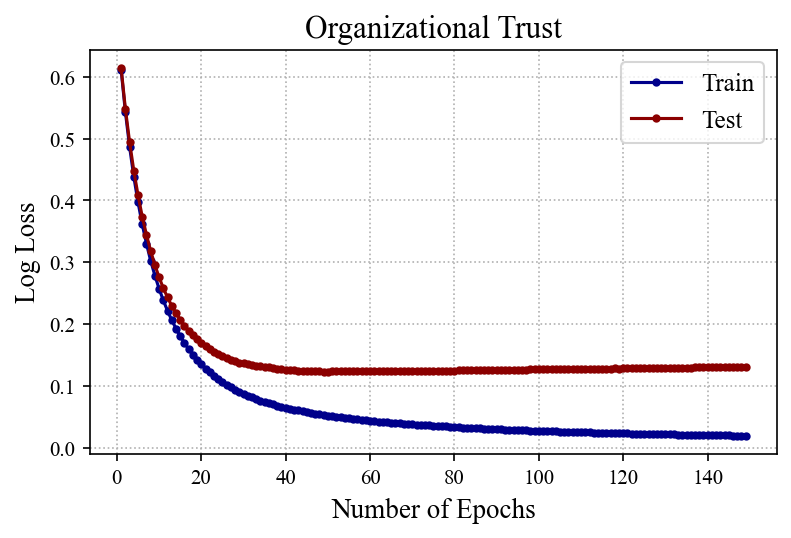

(XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
               grow_policy='depthwise', importance_type=None,
               interaction_constraints='', learning_rate=0.1, max_bin=256,
               max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
               max_depth=7, max_leaves=0, min_child_weight=3, missing=nan,
               monotone_constraints='()', n_estimators=200, n_jobs=0,
               num_class=1, num_parallel_tree=1, predictor='auto', ...),
       W21ID1  W21IND1  W21SCALE  W21Q01A  W21Q01B  W21Q02A  W21Q02B  W21Q03A  \
 2229   524.0      1.0       2.0   2012.0     11.0   2021.0      1.0      1.0   
 1171  2394.0      1.0       1.0   2007.0      5.0   2015.0      1.0      1.0   
 1446  4041.0      1.0       1.0   2020

In [13]:
XGBoost_learning_curve(X, y, 'Organizational Trust')

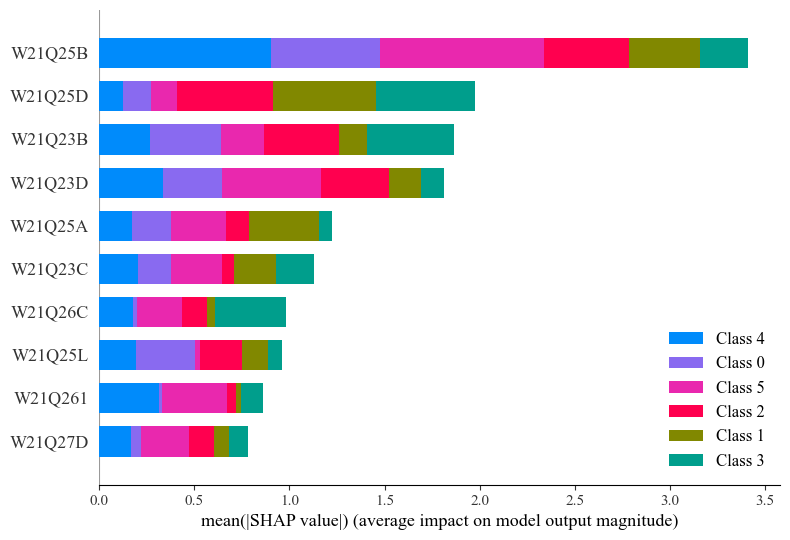

In [94]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)

shap.summary_plot(shap_values, x_tst, max_display=10)

#shap_figure = shap.dependence_plot(i, shap_values, X.values, feature_names=X.columns, dot_size=10, interaction_index=None, x_jitter=-0.5)

#ax_list = shap_figure .axes # see https://stackoverflow.com/a/24107230/11148296
#ax = ax_list[0]
#ax.set_xlabel('Time', fontsize=14)
#ax.set_ylabel('Values', fontsize=14)

In [103]:
#shap.plots.scatter(shap_values[:,"W21Q25B"])  

In [18]:
PI = list(PI)
FI = ['W21Q25B', 'W21Q25D', 'W21Q23B', 'W21Q23D', 'W21Q25A', 'W21Q23C', 'W21Q26C', 'W21Q25L', 'W21Q26I', 'W21Q27D']

In [19]:
from collections import Counter

arr_1d = np.array(np.array(FI+PI)).flatten()

element_counts = Counter(arr_1d)

top_5_elements = element_counts.most_common(5)

print("Top 5 elements with highest frequency:")
for element, frequency in top_5_elements:
    print("Element:", element, "Frequency:", frequency)

Top 5 elements with highest frequency:
Element: W21Q25B Frequency: 2
Element: W21Q25D Frequency: 2
Element: W21Q23B Frequency: 2
Element: W21Q23D Frequency: 2
Element: W21Q23C Frequency: 2


In [21]:
np.array(PI+FI)

array(['W21Q23A', 'W21Q25K', 'W21Q23B', 'W21Q23C', 'W21Q261', 'W21Q26C',
       'W21Q23D', 'W21Q22D', 'W21Q25D', 'W21Q25B', 'W21Q25B', 'W21Q25D',
       'W21Q23B', 'W21Q23D', 'W21Q25A', 'W21Q23C', 'W21Q26C', 'W21Q25L',
       'W21Q26I', 'W21Q27D'], dtype='<U7')

# 6. 직무만족 

(1)현재 하고 있는 일의 내용에 만족한다

(2)현재 받고 있는 임금에 만족한다

(3)현재 직장의 인간관계에 만족한다

하고 있는 일에 대한 전반적 만족도

In [24]:
scaler = MinMaxScaler()
df = call_df()
df = check_nan(df)
DF = copy.deepcopy(df)

Columns with NaN values and count of NaN values:
Column 'W21Q11A2' has 2349 NaN value(s).
Column 'W21Q11B2' has 3583 NaN value(s).
Column 'W21Q15A2' has 4487 NaN value(s).
Column 'W21Q15B2' has 3978 NaN value(s).
Column 'W21Q15C2' has 3584 NaN value(s).
Column 'W21Q15D2' has 5690 NaN value(s).
Column 'W21Q15E2' has 6613 NaN value(s).
Column 'W21Q16A2' has 6895 NaN value(s).
Column 'W21Q16B2' has 9294 NaN value(s).
Column 'W21Q16C2' has 9409 NaN value(s).
Column 'W21Q16D2' has 9456 NaN value(s).
Column 'W21Q191' has 6105 NaN value(s).
Column 'W21Q192' has 6105 NaN value(s).
Column 'W21Q31A' has 1259 NaN value(s).
Column 'W21Q31B' has 8119 NaN value(s).
Column 'W21DQ041' has 1536 NaN value(s).


W21Q26A
W21Q26B
W21Q26C
W21Q261
(2633, 4)
	Accuracy ========>  0.9089529590288316
classification_report
               precision    recall  f1-score   support

           0     0.9768    0.9817    0.9793       601
           1     0.9479    0.9741    0.9608       579
           2     0.9741    0.9869    0.9804       609
           3     0.9718    0.9816    0.9767       597

   micro avg     0.9678    0.9811    0.9744      2386
   macro avg     0.9676    0.9811    0.9743      2386
weighted avg     0.9678    0.9811    0.9744      2386
 samples avg     0.9050    0.9086    0.9024      2386

Index(['W21Q27F', 'W21Q09D', 'W21Q22D', 'W21DQ02A', 'W21ID1', 'W21Q27B',
       'W21Q27D', 'W21Q24D', 'W21Q25E', 'W21Q22F'],
      dtype='object')


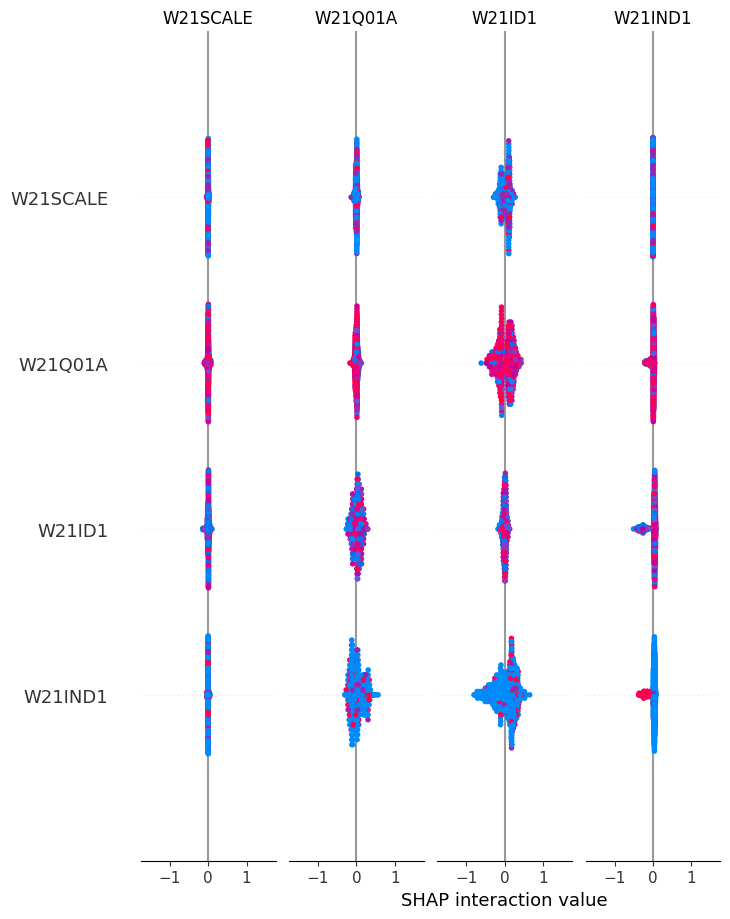

In [25]:
import shap
Y = ['W21Q26A', 'W21Q26B', 'W21Q26C', 'W21Q261']
X = class_one_to_five_TO_one_to_two_multi(df, Y)
X, y = equal_distirubution_mulit_label(X, Y)
y=y-1

model, x_tr, x_tst, y_tst, y_prd = XGBoost_multi_label(X, y)
PI = permutational_importance_(model, x_tst, y_tst, X)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)
shap.summary_plot(shap_values, x_tst, max_display=10)

In [26]:
for j in range(4):
    cnt, cnt2 = 0, 0
    for i in range(len(y_prd)):
        if y_prd[i][j] == y_tst[i][j]:
            cnt = cnt+1
        else:
            cnt2 = cnt2+1
            
    print(f'{cnt/(cnt+cnt2)}')

0.9620637329286799
0.9301972685887708
0.9635811836115327
0.9575113808801214


In [27]:
FI = ['W21Q27D', 'W21Q24F', 'W21Q24D', 'W21Q25D', 'W21Q27F', 'W21Q24E', 'W21Q27A', 'W21Q23A', 'W21Q22D', 'W21Q25B']
np.array(PI.tolist()+FI)

array(['W21Q27F', 'W21Q09D', 'W21Q22D', 'W21DQ02A', 'W21ID1', 'W21Q27B',
       'W21Q27D', 'W21Q24D', 'W21Q25E', 'W21Q22F', 'W21Q27D', 'W21Q24F',
       'W21Q24D', 'W21Q25D', 'W21Q27F', 'W21Q24E', 'W21Q27A', 'W21Q23A',
       'W21Q22D', 'W21Q25B'], dtype='<U8')

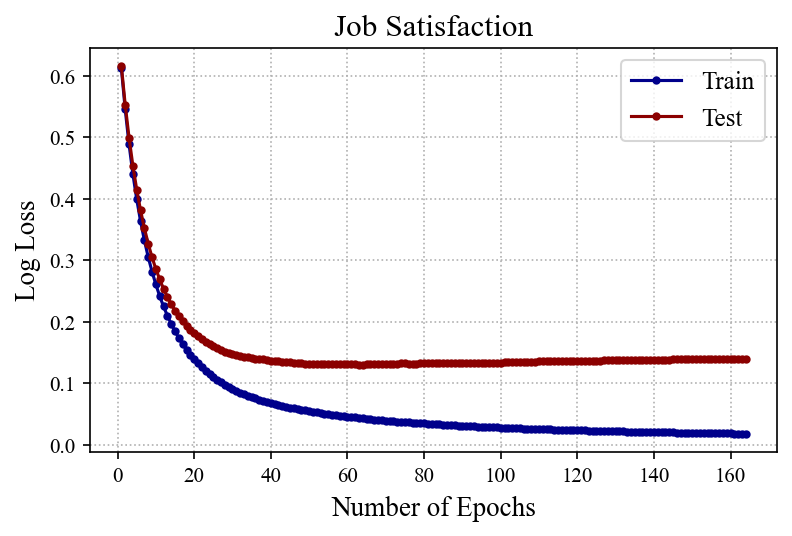

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=3, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_class=1,
               num_parallel_tree=None, predictor=None, ...),
       W21ID1  W21IND1  W21SCALE  W21Q01A  W21Q01B  W21Q02A  W21Q02B  W21Q03A  \
 2986   326.0      1.0       1.0   2002.0     11.0   2002.0     11.0      1.0   
 2880     5.0      2.0       3.0   2011.0      7.0   2019.0      1.0      1.0   
 2642  2

In [28]:
XGBoost_learning_curve(X, y, 'Job Satisfaction')

# 7. 조직몰입 

(1) 나는 조금이라도 좋은 조건을 제시하는 회사가 있으면 옮길 것을 고려해 보고 있다

(2) 나는 이 회사의 문제를 내 문제처럼 느낀다

(3) 만약 내가 이 회사를 떠나기로 결정한다면 내 인생의 너무 많은 것을 잃게 될 것이다

(4) 이 회사는 내가 충성할 만한 가치가 있다

In [29]:
scaler = MinMaxScaler()
df = call_df()
df = check_nan(df)
DF = copy.deepcopy(df)

Columns with NaN values and count of NaN values:
Column 'W21Q11A2' has 2349 NaN value(s).
Column 'W21Q11B2' has 3583 NaN value(s).
Column 'W21Q15A2' has 4487 NaN value(s).
Column 'W21Q15B2' has 3978 NaN value(s).
Column 'W21Q15C2' has 3584 NaN value(s).
Column 'W21Q15D2' has 5690 NaN value(s).
Column 'W21Q15E2' has 6613 NaN value(s).
Column 'W21Q16A2' has 6895 NaN value(s).
Column 'W21Q16B2' has 9294 NaN value(s).
Column 'W21Q16C2' has 9409 NaN value(s).
Column 'W21Q16D2' has 9456 NaN value(s).
Column 'W21Q191' has 6105 NaN value(s).
Column 'W21Q192' has 6105 NaN value(s).
Column 'W21Q31A' has 1259 NaN value(s).
Column 'W21Q31B' has 8119 NaN value(s).
Column 'W21DQ041' has 1536 NaN value(s).


W21Q27A
W21Q27B
W21Q27C
W21Q27D
(1972, 4)
	Accuracy ========>  0.5699797160243407
classification_report
               precision    recall  f1-score   support

           0     0.8297    0.8419    0.8358       272
           1     0.8835    0.8956    0.8895       364
           2     0.8149    0.8707    0.8419       263
           3     0.9091    0.9446    0.9265       307

   micro avg     0.8627    0.8905    0.8764      1206
   macro avg     0.8593    0.8882    0.8734      1206
weighted avg     0.8629    0.8905    0.8764      1206
 samples avg     0.8565    0.8521    0.8343      1206

Index(['W21Q081C', 'W21Q12C', 'W21Q02A', 'W21Q07', 'W21Q27G', 'W21DQ03',
       'W21Q261', 'W21DQ02A', 'W21Q27F', 'W21Q27E'],
      dtype='object')


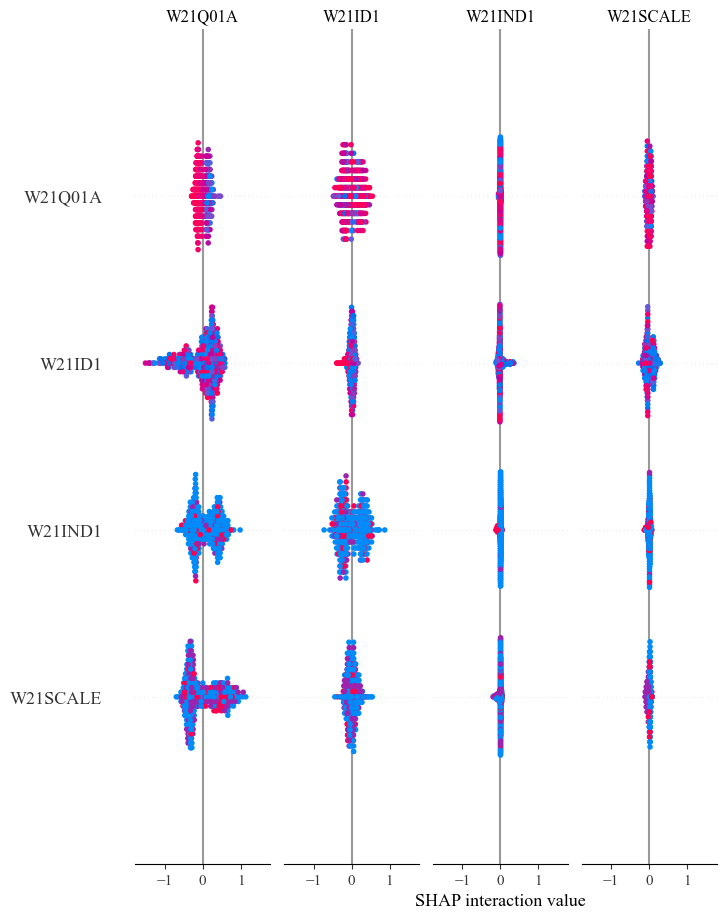

In [30]:
import shap
Y = ['W21Q27A', 'W21Q27B', 'W21Q27C', 'W21Q27D']
X = class_one_to_five_TO_one_to_two_multi(df, Y)
X, y = equal_distirubution_mulit_label(X, Y)
y=y-1

model, x_tr, x_tst, y_tst, y_prd = XGBoost_multi_label(X, y)
PI = permutational_importance_(model, x_tst, y_tst, X)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)
shap.summary_plot(shap_values, x_tst, max_display=10)

In [31]:
for j in range(4):
    cnt, cnt2 = 0, 0
    for i in range(len(y_prd)):
        if y_prd[i][j] == y_tst[i][j]:
            cnt = cnt+1
        else:
            cnt2 = cnt2+1
            
    print(f'{cnt/(cnt+cnt2)}')

0.8174442190669371
0.8356997971602435
0.8255578093306288
0.9066937119675457


In [32]:
FI = ['W21Q261', 'W21Q24F', 'W21Q26A', 'W21Q27E', 'W21DQ02A', 'W21Q26B', 'W21Q27G', 'W21Q01A', 'W21Q27F', 'W21Q24A']
np.array(PI.tolist()+FI)

array(['W21Q081C', 'W21Q12C', 'W21Q02A', 'W21Q07', 'W21Q27G', 'W21DQ03',
       'W21Q261', 'W21DQ02A', 'W21Q27F', 'W21Q27E', 'W21Q261', 'W21Q24F',
       'W21Q26A', 'W21Q27E', 'W21DQ02A', 'W21Q26B', 'W21Q27G', 'W21Q01A',
       'W21Q27F', 'W21Q24A'], dtype='<U8')

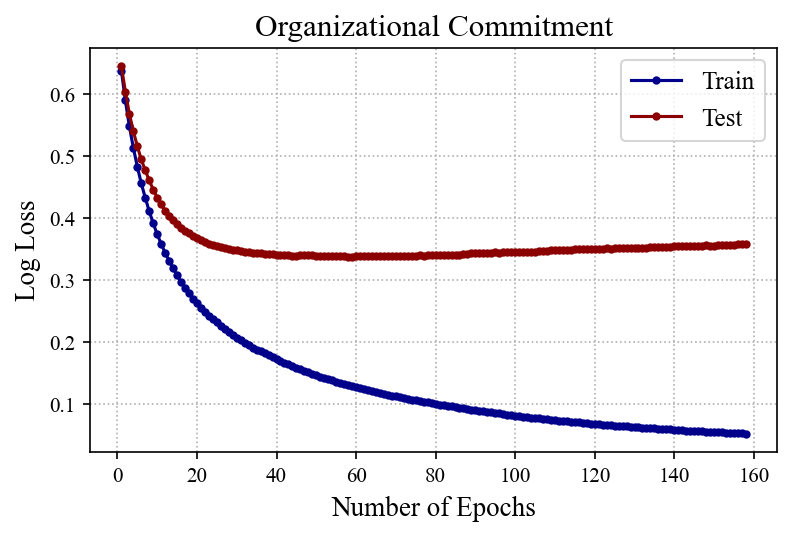

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=3, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_class=1,
               num_parallel_tree=None, predictor=None, ...),
       W21ID1  W21IND1  W21SCALE  W21Q01A  W21Q01B  W21Q02A  W21Q02B  W21Q03A  \
 1376  3580.0      1.0       1.0   2013.0     12.0   2020.0      1.0      1.0   
 906    271.0      1.0       2.0   2007.0      7.0   2018.0      1.0      1.0   
 1036   

In [33]:
XGBoost_learning_curve(X, y, 'Organizational Commitment')

# 8. 번아웃 

(6) 나는 현재 업무로 인해 무력감이나 피곤함을 느낄 때가 많아졌다

In [34]:
scaler = MinMaxScaler()
df = call_df()
df = check_nan(df)
DF = copy.deepcopy(df)

Columns with NaN values and count of NaN values:
Column 'W21Q11A2' has 2349 NaN value(s).
Column 'W21Q11B2' has 3583 NaN value(s).
Column 'W21Q15A2' has 4487 NaN value(s).
Column 'W21Q15B2' has 3978 NaN value(s).
Column 'W21Q15C2' has 3584 NaN value(s).
Column 'W21Q15D2' has 5690 NaN value(s).
Column 'W21Q15E2' has 6613 NaN value(s).
Column 'W21Q16A2' has 6895 NaN value(s).
Column 'W21Q16B2' has 9294 NaN value(s).
Column 'W21Q16C2' has 9409 NaN value(s).
Column 'W21Q16D2' has 9456 NaN value(s).
Column 'W21Q191' has 6105 NaN value(s).
Column 'W21Q192' has 6105 NaN value(s).
Column 'W21Q31A' has 1259 NaN value(s).
Column 'W21Q31B' has 8119 NaN value(s).
Column 'W21DQ041' has 1536 NaN value(s).


In [35]:
import shap
Y = ['W21Q27F']
X = class_one_to_five_TO_one_to_two_multi(df, Y)
X, y = equal_distirubution_mulit_label(X, Y)
y=y-1

model, x_tr, x_tst, y_tst, y_prd = XGBoost_multi_label(X, y)
PI = permutational_importance_(model, x_tst, y_tst, X)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)
shap.summary_plot(shap_values, x_tst, max_display=10)

W21Q27F
(4390, 1)


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
for j in range(1):
    cnt, cnt2 = 0, 0
    for i in range(len(y_prd)):
        if y_prd[i][j] == y_tst[i][j]:
            cnt = cnt+1
        else:
            cnt2 = cnt2+1
            
    print(f'{cnt/(cnt+cnt2)}')

In [ ]:
arr = [[87.54 , 87.33 , 87.23 , 87.02],
[85.74 , 86.90 , 86.03 , 87.05],
[87.39 , 88.54 , 88.11 , 87.39],
[88.86 , 90.36 , 89.10 , 87.62],
[94.25 , 94.79 , 93.70 , 93.49],
[93.03 , 92.32 , 92.88 , 93.46],
[84.43 , 85.03 , 85.63 , 85.33],
[88.14 , 88.08 , 87.18 , 85.91],
[83.40 , 82.18 , 85.02 , 84.62],
[86.98 , 90.48 , 89.52 , 88.57],
[81.74 , 81.33 , 81.42 , 79.72],
[79.02 , 80.02 , 78.62 , 77.60],
[84.19 , 83.65 , 83.98 , 83.06],
[90.27 , 89.77 , 89.07 , 90.57],
[86.91 , 86.91 , 86.80 , 85.41]]

np.mean(np.array(arr).T, axis=1)

In [ ]:
np.std(np.array(arr).T, axis=1)

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)

# Visualize SHAP values
shap.summary_plot(shap_values, x_tst)

In [ ]:
sv = explainer(X)
shap.plots.waterfall(sv[0])

In [ ]:
import shap

shap.initjs()
sv = explainer(X)
shap.plots.force(sv[0])

In [ ]:
shap.plots.scatter(sv[:,"W21ID1"], color=sv)

In [ ]:
imp_lst1 = ['W21Q27E', 'W21Q27G', 'W21Q261', 'W21Q26A', 'W21Q27A']
imp_lst2 = ['W21ID1', 'W21Q04', 'W21Q27G', 'W21DQ02A', 'W21Q27E']

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, x_tst, y_tst, n_repeats=10, random_state=42)

feature_names = X.columns

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances')
plt.show()

In [ ]:
feature_names[sorted_idx][-10:]

# Feature importance랑 Permutation importance는 유사함 (sorting)

# SMOTE -> data augmentation based on synthetic dataset

justification: 심하게 skewed 된 학습데이터만 증강 기법을 써서 올림 => test 데이터 자체는 그대로 유지

Overfitting 이 보이는 시점이 있음 => 실제로 어느정도는 도움이 된다는 뜻

In [ ]:
from xgboost import XGBClassifier, plot_importance
scaler = MinMaxScaler()
from imblearn.over_sampling import SMOTE

X = df_no_nan.drop(columns=[Y[target_idx]])
y = df_no_nan[Y[target_idx]] 
X_normalized = scaler.fit_transform(X)
df = pd.DataFrame(X_normalized, columns=X.columns)

print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)

print(y_resampled.value_counts())

In [ ]:
y_resampled = y_resampled - 1

X_train, X_test, y_train, y_test = train_test_split(balanced_df, y_resampled, test_size=0.2, random_state=42)

num_boost_round = 300  
model = XGBClassifier(n_estimators=num_boost_round)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=True)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)